In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
from scipy import stats
import seaborn as sns

In [61]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head(5)

,Survived,Age,Fare
0,1,35.0,512.3292
1,1,36.0,512.3292
2,1,35.0,512.3292
3,0,19.0,263.0000
4,1,23.0,263.0000


In [86]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]


In [87]:
x.fillna(x['Age'].mean(),inplace=True)
x.isnull().sum()

Age     0
Fare    0
dtype: int64

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 2), (179, 2), (712,), (179,))

C:\Users\arsal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


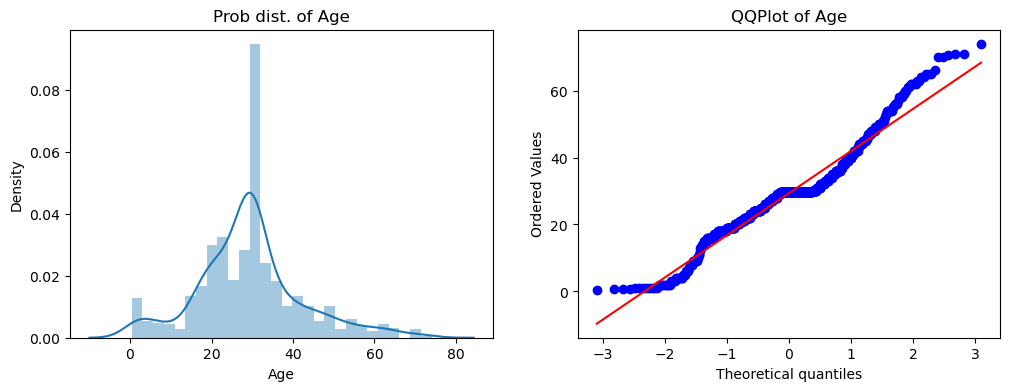

In [51]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Prob dist. of Age')
plt.subplot(122)

stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQPlot of Age',loc='center')
plt.show()

C:\Users\arsal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


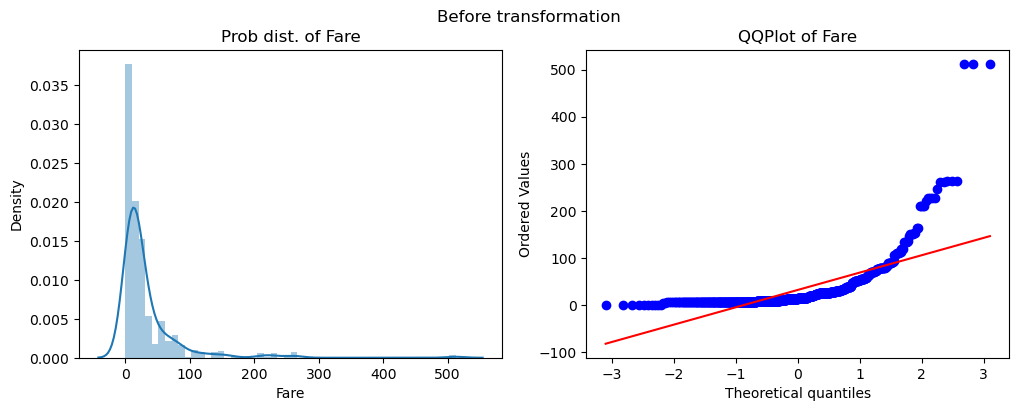

In [54]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Prob dist. of Fare')
plt.subplot(122)
plt.suptitle('Before transformation')
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('QQPlot of Fare',loc='center')
plt.show()

In [90]:
trf1 = ColumnTransformer(transformers=[('trf1',FunctionTransformer(func=np.log1p),['Fare'])],
                        remainder='passthrough')
x_train_trans = trf1.fit_transform(x_train)
x_test_trans = trf1.transform(x_test)

In [91]:
x_test_trans[:,0]

array([2.18371146, 2.74084002, 2.1071783 , 2.18089192, 4.79579055,
       3.30505352, 3.29583687, 3.27588734, 3.52636052, 4.04129534,
       4.04129534, 2.18557926, 2.63905733, 3.40535539, 3.19663022,
       2.08619369, 2.20276476, 2.18885633, 0.        , 4.25632168,
       3.30505352, 2.73788081, 3.63098548, 2.18557926, 2.44234704,
       2.1102132 , 4.99396918, 2.18557926, 4.47163879, 2.87356464,
       0.        , 3.99083419, 2.16619247, 3.4339872 , 3.55594217,
       2.20276476, 5.03995135, 3.58351894, 2.1071783 , 2.17190677,
       4.13323189, 2.63905733, 2.1071783 , 2.16714331, 3.09104245,
       4.37281812, 4.43645563, 3.17805383, 3.50618183, 2.18885633,
       2.73788081, 2.1102132 , 3.09444575, 2.14593128, 3.31600254,
       2.26825241, 4.43269955, 3.29583687, 3.47777255, 4.73860782,
       2.82731362, 2.73788081, 2.78783441, 3.8691155 , 3.59731226,
       2.1690537 , 4.42089632, 2.80336038, 2.44234704, 2.26825241,
       3.29583687, 3.29583687, 0.        , 2.1076888 , 2.10768

C:\Users\arsal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


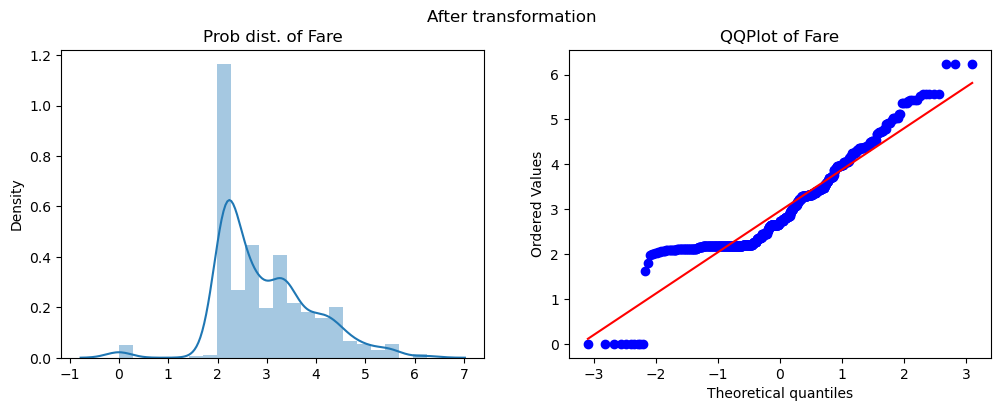

In [92]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
sns.distplot(x_train_trans[:,0])
plt.title('Prob dist. of Fare')
plt.subplot(122)
plt.suptitle('After transformation')
stats.probplot(x_train_trans[:,0],dist='norm',plot=plt)
plt.title('QQPlot of Fare',loc='center')
plt.show()

In [93]:
clf = LogisticRegression()

In [94]:
clf.fit(x_train_trans,y_train)

LogisticRegression()

In [96]:
y_pred = clf.predict(x_test_trans)
accuracy_score(y_test,y_pred)

0.664804469273743

In [97]:
cross_val = cross_val_score(clf,x_train_trans,y_train,cv=10)
cross_val.mean()

0.671244131455399

In [98]:
cross_val = cross_val_score(clf,x_test_trans,y_test,cv=10)
cross_val.mean()

0.6702614379084968

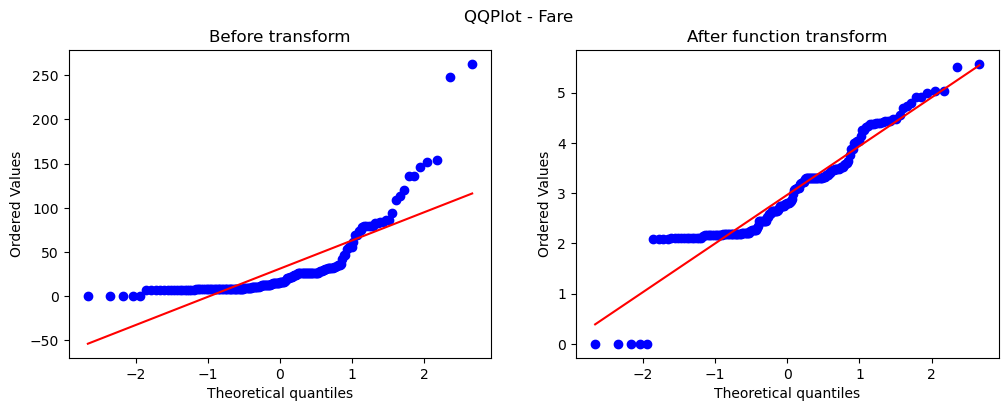

In [105]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
stats.probplot(x_test['Fare'],dist='norm',plot=plt)
plt.title('Before transform')
plt.subplot(122)
plt.suptitle('QQPlot - Fare')
stats.probplot(x_test_trans[:,0],dist='norm',plot=plt)
plt.title('After function transform',loc='center')
plt.show()

In [116]:
pipe = Pipeline([('tf1',trf1),
               ('trf2',LogisticRegression())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Fare'])])),
                ('trf2', LogisticRegression())])

In [115]:
set_config(display='diagram')
y_predd = pipe.predict(x_test)

In [110]:
accuracy_score(y_test,y_predd)

0.664804469273743

In [118]:
pipe.named_steps

{'tf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf1',
                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                  ['Fare'])]),
 'trf2': LogisticRegression()}

In [129]:
pipe.named_steps['tf1'].transformers[0][1]

FunctionTransformer(func=<ufunc 'log1p'>)